# HW1 CompSem
## Выполнила Яна Захарова, БКЛ213. Email: yapzakharova@edu.hse 😊

## Шаг 1 (0.3 балла). 

В базе WordNet возьмите синсет 'search.v.01'. Из всех языков, которые есть в базе, извлеките списки лемм, относящихся к этому синсету

In [219]:
!pip install nltk


Defaulting to user installation because normal site-packages is not writeable


In [220]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Яна\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Яна\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [576]:
wn.synset('learn.v.01').lemma_names('fin')

['oppia']

In [577]:
sorted(wn.langs())

['als',
 'arb',
 'bul',
 'cat',
 'cmn',
 'dan',
 'ell',
 'eng',
 'eus',
 'fin',
 'fra',
 'glg',
 'heb',
 'hrv',
 'ind',
 'isl',
 'ita',
 'ita_iwn',
 'jpn',
 'lit',
 'nld',
 'nno',
 'nob',
 'pol',
 'por',
 'ron',
 'slk',
 'slv',
 'spa',
 'swe',
 'tha',
 'zsm']

In [578]:
languages = wn.langs()

# Извлекаем леммы для каждого языка
for lang in languages:
    target_lemmas = wn.synset('know.v.01').lemma_names(lang)
    print(target_lemmas)


['know', 'cognize', 'cognise']
['di', 'vë_re']
['أدْرك', 'درى', 'عانى', 'عرف', 'عرف_جيدا', 'عرف_شخص', 'علم', 'علِم', 'فهم', 'ميز']
[]
[]
[]
['λαμβάνω_γνώση']
['olla_tietoinen', 'tietää']
['connaître', 'savoir']
['יָדַע']
['saznati', 'saznavati', 'spoznati', 'spoznavati', 'upoznati', 'upoznati_se', 'upoznavati', 'upoznavati_se', 'znati']
[]
['conoscere', 'sapere']
[]
['分かる', '存じる', '存ずる', '存知+する', '知る']
['conèixer', 'saber']
['antzeman', 'ezagutu', 'jakin']
['coñecer', 'saber']
['conocer', 'saber']
['kenal', 'memaklumi', 'mengenal', 'mengenali', 'mengetahui', 'tahu']
['kenal', 'memaklumi', 'mengenal', 'mengenali', 'mengetahui', 'tahu']
['bemerken', 'kennen', 'weten']
[]
[]
[]
['conhecer', 'entender', 'saber']
['cunoaște', 'ști']
[]
[]
['poznati', 'spoznati', 'vedeti', 'znati']
[]
['รู้']


## Шаг 2 (0.7 балла)

Теперь, наоборот, для каждой леммы из каждого языка составьте список синсетов, к которым она относится. Из этих синсетов выберите такие, к которым относится больше 3 лемм из нашего изначального списка (надеемся, что это поможет нам выделить более устойчивые и надежные связи). Оставшиеся синсеты и станут узлами нашего графа.

In [579]:
#СПИСОК СИНСЕТОВ
from nltk.corpus import wordnet

# Заданный синсет 'search.v.01'
initial_synset_id = 'know.v.01'
initial_synset = wordnet.synset(initial_synset_id)

# Получаем все языки в WordNet
languages = wordnet.langs()

# Итерируем по каждому языку

for lang in languages:
    # Получаем список лемм для текущего языка
    target_lemmas = wn.synset('know.v.01').lemma_names(lang)
    
    # Итерируем по каждой лемме
    for lemma in target_lemmas:
        # Получаем все синсеты, к которым относится текущая лемма
        # lemma_synsets = wn.lemmas(lemma, lang = lang)
        lemma_synsets = wn.synsets(lemma, lang = lang)
        
        # Выводим информацию о синсетах
        print(f"Lemma: {lemma}, Language: {lang}, Synsets: {lemma_synsets}")

Lemma: know, Language: eng, Synsets: [Synset('know.n.01'), Synset('know.v.01'), Synset('know.v.02'), Synset('know.v.03'), Synset('know.v.04'), Synset('know.v.05'), Synset('acknowledge.v.06'), Synset('know.v.07'), Synset('sleep_together.v.01'), Synset('know.v.09'), Synset('know.v.10'), Synset('know.v.11')]
Lemma: cognize, Language: eng, Synsets: [Synset('know.v.01')]
Lemma: cognise, Language: eng, Synsets: [Synset('know.v.01')]
Lemma: di, Language: als, Synsets: [Synset('know.v.01')]
Lemma: vë_re, Language: als, Synsets: [Synset('know.v.01')]
Lemma: أدْرك, Language: arb, Synsets: [Synset('sense.v.04'), Synset('catch.v.18'), Synset('understand.v.02'), Synset('know.v.01'), Synset('know.v.03'), Synset('catch_up.v.02'), Synset('learn.v.02'), Synset('tell.v.05'), Synset('recognize.v.02'), Synset('perceive.v.01'), Synset('catch.v.02')]
Lemma: درى, Language: arb, Synsets: [Synset('know.v.01'), Synset('know.v.03'), Synset('sleep_together.v.01')]
Lemma: عانى, Language: arb, Synsets: [Synset('giv

In [580]:
#БОЛЬШЕ 3 ЛЕММ
from nltk.corpus import wordnet

# Заданный синсет 'search.v.01'
initial_synset_id = 'know.v.01'
initial_synset = wordnet.synset(initial_synset_id)

# Получаем все языки в WordNet
languages = wordnet.langs()
synset_count = {}

# Итерируем по каждому языку

for lang in languages:
    # Получаем список лемм для текущего языка
    target_lemmas = wn.synset('know.v.01').lemma_names(lang)
    
    # Итерируем по каждой лемме
    for lemma in target_lemmas:
        # Получаем все синсеты, к которым относится текущая лемма
        # lemma_synsets = wn.lemmas(lemma, lang = lang)
        lemma_synsets = wn.synsets(lemma, lang = lang)
        
        # Выводим информацию о синсетах
#         print(f"Lemma: {lemma}, Language: {lang}, Synsets: {lemma_synsets}")
# Обновляем словарь синсетов и их вхождений
#         synset_count = {}
        for synset in lemma_synsets:
            if synset not in synset_count:
                synset_count[synset] = 1
            else:
                synset_count[synset] += 1
# Фильтруем синсеты, в которые входит более трех слов
result = [synset for synset, count in synset_count.items() if count > 3]
print(result)

[Synset('know.n.01'), Synset('know.v.01'), Synset('know.v.02'), Synset('know.v.03'), Synset('know.v.04'), Synset('know.v.05'), Synset('acknowledge.v.06'), Synset('know.v.07'), Synset('sleep_together.v.01'), Synset('know.v.09'), Synset('know.v.10'), Synset('know.v.11'), Synset('understand.v.02'), Synset('learn.v.02'), Synset('tell.v.05'), Synset('recognize.v.02'), Synset('perceive.v.01'), Synset('experience.v.01'), Synset('recognize.v.04'), Synset('determine.v.08'), Synset('realize.v.03'), Synset('meet.v.01'), Synset('grok.v.01'), Synset('understand.v.01'), Synset('identify.v.01'), Synset('spot.v.02'), Synset('sympathize.v.02'), Synset('cognition.n.01'), Synset('meet.v.08'), Synset('understand.v.03'), Synset('identify.v.06'), Synset('identify.v.05')]


In [581]:
len(result)

32

## Шаг 3 (1 балл)
Теперь строим ребра. Ребро между двумя синсетами ставьте в том случае, если **хотя бы в одном языке есть хотя бы одна лемма, которая относится к ним обоим**. Пусть граф будет взвешенным: вес ребра будет отражать количество лемм, относящихся к обоим узлам пары.

NB! На этом шаге мы уже забываем про исходный список лемм из шага 1 (он нам нужен был только для отбора синсетов) и учитываем все леммы, относящиеся к отобранным узлам.

Критерии: 0.5 балла - ребра, 0.5 балла - вес ребер

In [582]:
#ПЕРЕКОНВЕРТИРОВА НАБОР СЕТОВ В ЕДИНЫЙ СЕТ
synset0 = wn.synset('know.v.01')
#Программа из задания 1, нахожу леммы для синсета 1
languages = wn.langs()

combined_set = set()
for lang in languages:    
    target_lemmas = synset0.lemma_names(lang)
    target_lemmas = list(set(target_lemmas))
#     print(target_lemmas)
    combined_set |= set(target_lemmas)

# Выводим результат
print(combined_set)
len(combined_set)

{'عرف', 'conoscere', 'vë_re', 'عرف_شخص', 'ميز', 'connaître', 'kennen', 'فهم', 'conèixer', 'sapere', 'tahu', 'cunoaște', 'olla_tietoinen', 'יָדַע', 'antzeman', 'أدْرك', 'λαμβάνω_γνώση', 'saber', 'vedeti', 'upoznavati_se', 'know', 'savoir', 'znati', 'ezagutu', 'upoznavati', 'cognise', 'spoznati', 'mengenal', 'عرف_جيدا', 'entender', 'coñecer', 'jakin', '存じる', 'conhecer', '知る', 'spoznavati', 'mengenali', 'cognize', 'saznati', 'mengetahui', 'kenal', 'ști', 'علِم', 'علم', 'poznati', 'upoznati', 'รู้', 'saznavati', 'memaklumi', 'درى', 'weten', 'عانى', '分かる', 'di', 'bemerken', 'upoznati_se', '存ずる', '存知+する', 'conocer', 'tietää'}


60

In [583]:
#СПИСОК ПАР СИНСЕТОВ
from itertools import combinations

result = ['know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'acknowledge.v.06', 
          'know.v.07', 'sleep_together.v.01', 'know.v.09', 'know.v.10', 'know.v.11', 'understand.v.02', 
          'learn.v.02', 'tell.v.05', 'recognize.v.02', 'perceive.v.01', 'experience.v.01','recognize.v.04', 
          'determine.v.08', 'realize.v.03', 'meet.v.01', 'grok.v.01', 'understand.v.01', 'identify.v.01', 'spot.v.02',
          'sympathize.v.02', 'cognition.n.01', 'meet.v.08', 'understand.v.03', 'identify.v.06', 'identify.v.05']

# Создаем множество уникальных пар синсетов
unique_synset_pairs = set(combinations(result, 2))

# Выводим результат
print(unique_synset_pairs)


{('determine.v.08', 'meet.v.08'), ('know.v.04', 'identify.v.06'), ('acknowledge.v.06', 'tell.v.05'), ('recognize.v.04', 'identify.v.05'), ('know.v.02', 'recognize.v.02'), ('know.n.01', 'know.v.05'), ('sleep_together.v.01', 'meet.v.08'), ('understand.v.01', 'identify.v.06'), ('recognize.v.04', 'identify.v.01'), ('perceive.v.01', 'spot.v.02'), ('know.v.10', 'grok.v.01'), ('learn.v.02', 'recognize.v.02'), ('know.v.05', 'experience.v.01'), ('tell.v.05', 'meet.v.01'), ('determine.v.08', 'identify.v.06'), ('grok.v.01', 'understand.v.01'), ('tell.v.05', 'sympathize.v.02'), ('know.v.05', 'cognition.n.01'), ('know.n.01', 'realize.v.03'), ('identify.v.01', 'sympathize.v.02'), ('sleep_together.v.01', 'identify.v.06'), ('acknowledge.v.06', 'sleep_together.v.01'), ('know.v.02', 'know.v.07'), ('know.v.09', 'perceive.v.01'), ('know.v.04', 'experience.v.01'), ('know.v.03', 'understand.v.01'), ('acknowledge.v.06', 'experience.v.01'), ('know.v.02', 'know.v.03'), ('know.v.03', 'know.v.11'), ('grok.v.01',

In [584]:
print(len(unique_synset_pairs))

496


In [585]:
from itertools import combinations
from nltk.corpus import wordnet as wn

result = ['know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'acknowledge.v.06', 
          'know.v.07', 'sleep_together.v.01', 'know.v.09', 'know.v.10', 'know.v.11', 'understand.v.02', 
          'learn.v.02', 'tell.v.05', 'recognize.v.02', 'perceive.v.01', 'experience.v.01','recognize.v.04', 
          'determine.v.08', 'realize.v.03', 'meet.v.01', 'grok.v.01', 'understand.v.01', 'identify.v.01', 'spot.v.02',
          'sympathize.v.02', 'cognition.n.01', 'meet.v.08', 'understand.v.03', 'identify.v.06', 'identify.v.05']

# Используем combinations для создания всех уникальных пар в текущем списке
pairs_in_list = combinations(result, 2)
unique_synset_pairs = list(pairs_in_list)

languages = wn.langs()

# Цикл для обработки каждой пары синсетов
for pairs in unique_synset_pairs:
    synset1 = wn.synset(pairs[0])
    synset2 = wn.synset(pairs[1])

    # Создаем пустые сеты
    combined_set1 = set()
    combined_set2 = set()

    # Находим леммы для каждого синсета, переконвертируем в сеты
    for lang in languages:
        pair_synset1 = synset1.lemma_names(lang)
        combined_set1 |= set(pair_synset1)

        pair_synset2 = synset2.lemma_names(lang)
        combined_set2 |= set(pair_synset2)

    # Находим общие слова между тремя синсетами
    knot = combined_set1.intersection(combined_set2)

    # Печатаем пару, если больше одного общего слова
    if len(knot) >= 1:
        print(f'{synset1} и {synset2}. Общие слова между синсетами: {knot}.\n Количество общих слов = {len(knot)} ')


Synset('know.n.01') и Synset('know.v.01'). Общие слова между синсетами: {'vedeti', 'know', 'mengetahui', 'znati', 'tahu'}.
 Количество общих слов = 5 
Synset('know.n.01') и Synset('know.v.02'). Общие слова между синсетами: {'vedeti', 'know', 'mengetahui', 'znati', 'tahu'}.
 Количество общих слов = 5 
Synset('know.n.01') и Synset('know.v.03'). Общие слова между синсетами: {'vedeti', 'know', 'mengetahui', 'znati', 'tahu'}.
 Количество общих слов = 5 
Synset('know.n.01') и Synset('know.v.04'). Общие слова между синсетами: {'tahu', 'vedeti', 'know', 'znati'}.
 Количество общих слов = 4 
Synset('know.n.01') и Synset('know.v.05'). Общие слова между синсетами: {'vedeti', 'know', 'mengetahui', 'znati', 'tahu'}.
 Количество общих слов = 5 
Synset('know.n.01') и Synset('acknowledge.v.06'). Общие слова между синсетами: {'vedeti', 'know', 'mengetahui', 'znati', 'tahu'}.
 Количество общих слов = 5 
Synset('know.n.01') и Synset('know.v.07'). Общие слова между синсетами: {'vedeti', 'know', 'znati'}.


### Граф 1

In [586]:
import networkx as nx

In [587]:
G1 = nx.Graph() # пустой граф

In [588]:
#узлы
result = ['know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'acknowledge.v.06', 
          'know.v.07', 'sleep_together.v.01', 'know.v.09', 'know.v.10', 'know.v.11', 'understand.v.02', 
          'learn.v.02', 'tell.v.05', 'recognize.v.02', 'perceive.v.01', 'experience.v.01','recognize.v.04', 
          'determine.v.08', 'realize.v.03', 'meet.v.01', 'grok.v.01', 'understand.v.01', 'identify.v.01', 'spot.v.02',
          'sympathize.v.02', 'cognition.n.01', 'meet.v.08', 'understand.v.03', 'identify.v.06', 'identify.v.05']

G1.add_nodes_from(result) # добавляем несколько узлов сразу

In [589]:
# рёбра
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from nltk.corpus import wordnet as wn

result = ['know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'acknowledge.v.06', 
          'know.v.07', 'sleep_together.v.01', 'know.v.09', 'know.v.10', 'know.v.11', 'understand.v.02', 
          'learn.v.02', 'tell.v.05', 'recognize.v.02', 'perceive.v.01', 'experience.v.01','recognize.v.04', 
          'determine.v.08', 'realize.v.03', 'meet.v.01', 'grok.v.01', 'understand.v.01', 'identify.v.01', 'spot.v.02',
          'sympathize.v.02', 'cognition.n.01', 'meet.v.08', 'understand.v.03', 'identify.v.06', 'identify.v.05']

# Используем combinations для создания всех уникальных пар в текущем списке
pairs_in_list = combinations(result, 2)
unique_synset_pairs = list(pairs_in_list)

languages = wn.langs()

# Создаем взвешенный граф
G1 = nx.Graph()

# Добавляем узлы
G1.add_nodes_from(result)

# Цикл для обработки каждой пары синсетов
for pairs in unique_synset_pairs:
    synset1 = wn.synset(pairs[0])
    synset2 = wn.synset(pairs[1])

    # Создаем пустые сеты
    combined_set1 = set()
    combined_set2 = set()

    # Находим леммы для каждого синсета, переконвертируем в сеты
    for lang in languages:
        pair_synset1 = synset1.lemma_names(lang)
        combined_set1 |= set(pair_synset1)

        pair_synset2 = synset2.lemma_names(lang)
        combined_set2 |= set(pair_synset2)

    # Находим общие слова между синсетами
    knot = combined_set1.intersection(combined_set2)

    # Добавляем ребро с весом
    if len(knot) >= 1:
        weight = len(knot)
        #G1.add_edge(pairs[0], pairs[1], weight = weight)
        G1.add_edge(pairs[0], pairs[1], weight = weight)


In [590]:
print('узлы', G1.nodes())
print('рёбра', G1.edges())

узлы ['know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'acknowledge.v.06', 'know.v.07', 'sleep_together.v.01', 'know.v.09', 'know.v.10', 'know.v.11', 'understand.v.02', 'learn.v.02', 'tell.v.05', 'recognize.v.02', 'perceive.v.01', 'experience.v.01', 'recognize.v.04', 'determine.v.08', 'realize.v.03', 'meet.v.01', 'grok.v.01', 'understand.v.01', 'identify.v.01', 'spot.v.02', 'sympathize.v.02', 'cognition.n.01', 'meet.v.08', 'understand.v.03', 'identify.v.06', 'identify.v.05']
рёбра [('know.n.01', 'know.v.01'), ('know.n.01', 'know.v.02'), ('know.n.01', 'know.v.03'), ('know.n.01', 'know.v.04'), ('know.n.01', 'know.v.05'), ('know.n.01', 'acknowledge.v.06'), ('know.n.01', 'know.v.07'), ('know.n.01', 'sleep_together.v.01'), ('know.n.01', 'know.v.09'), ('know.n.01', 'know.v.10'), ('know.n.01', 'know.v.11'), ('know.n.01', 'learn.v.02'), ('know.n.01', 'tell.v.05'), ('know.n.01', 'recognize.v.02'), ('know.n.01', 'determine.v.08'), ('know.n.01', 'realize.v.03'), ('kno

In [591]:
nx.write_gexf(G1, 'graph_file.gexf')

In [592]:
G1 = nx.read_gexf('graph_file.gexf')

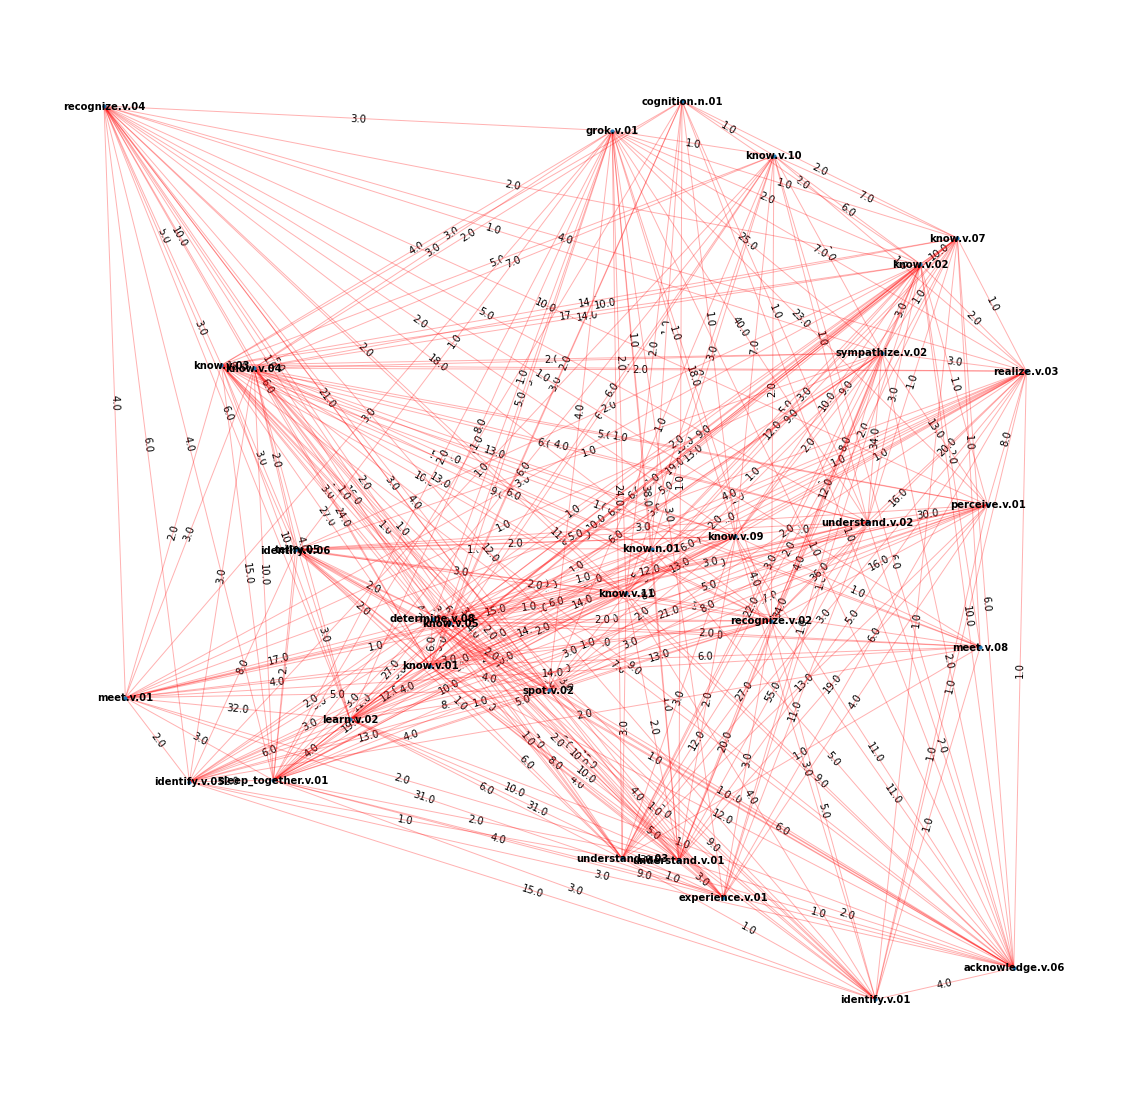

In [593]:
import matplotlib.pyplot as plt 

#способ "укладки" графа
pos=nx.random_layout(G1)
#размер графа
plt.figure(figsize=(20, 20))
#рисуем узлы графа  в соответствии с распределением pos и устанавливаем размер узлов == 10
nx.draw_networkx_nodes(G1, pos, node_size=10) 
# получаем веса ребер 
labels = nx.get_edge_attributes(G1, 'weight')
#рисуем метки для рёбер, используя полученные веса
nx.draw_networkx_edge_labels(G1, pos, edge_labels=labels)
#alpha=0.3 - прозрачность рёбер, edge_color='red' - цвет рёбер красный
nx.draw_networkx_edges(G1, pos, alpha=0.3, edge_color='red')
#font_size=10 размер шрифта = 10, font_weight='bold' жирный текст 
nx.draw_networkx_labels(G1, pos, font_size=10, font_weight='bold')
#убираем оси
plt.axis('off') 
plt.show()

## Шаг 4 (3 балла)
Проанализируйте получившийся граф. Сколько получилось связных компонент? Какая у этого графа плотность? Как распределились (взвешенные) степени узлов? Какие узлы оказались центральными (попробуйте несколько метрик, например, degree centrality и eigencentrality, прокомментируйте результат)? Разбейте граф на сообщества (поиграйте с несколькими алгоритмами) и прокомментируйте результаты.

Критерии: 0.5 - связные компоненты, 0.5 - плотность графа, 1 - степени и центральность узлов, 1 - сообщества

### Связные компоненты

In [594]:
#Связные компоненты

from collections import Counter
# Выделение связных компонент

components = nx.components.connected_components(G1)
component_lengths = Counter([len(i) for i in components])
component_lengths.most_common()

[(32, 1)]

In [595]:
components = nx.components.connected_components(G1)
nodes = sorted([(i, len(i)) for i in components], key=lambda x: x[1], reverse=True)[0][0]
len(nodes)

32

### Плотность графа

In [596]:
# Плотность графа

print('Плотность графа:', nx.density(G1))

Плотность графа: 0.7641129032258065


### Распределение взвешенных степеней узлов.

In [597]:
# Распределение взвешенных степеней узлов.
# Взвешенная степень (weighted degree) – это количество связей узла, разделенное на общее количество связей в графе
weighted_degrees = dict(G1.degree(weight = 'weight'))
print("Распределение взвешенных степеней узлов:")
for node, degree in weighted_degrees.items():
    print(f"{node}: {degree}")

Распределение взвешенных степеней узлов:
know.n.01: 59.0
know.v.01: 285.0
know.v.02: 174.0
know.v.03: 212.0
know.v.04: 201.0
know.v.05: 217.0
acknowledge.v.06: 144.0
know.v.07: 110.0
sleep_together.v.01: 163.0
know.v.09: 149.0
know.v.10: 74.0
know.v.11: 149.0
understand.v.02: 350.0
learn.v.02: 252.0
tell.v.05: 31.0
recognize.v.02: 268.0
perceive.v.01: 207.0
experience.v.01: 142.0
recognize.v.04: 151.0
determine.v.08: 108.0
realize.v.03: 114.0
meet.v.01: 158.0
grok.v.01: 226.0
understand.v.01: 259.0
identify.v.01: 83.0
spot.v.02: 134.0
sympathize.v.02: 178.0
cognition.n.01: 23.0
meet.v.08: 42.0
understand.v.03: 177.0
identify.v.06: 38.0
identify.v.05: 80.0


### Центральные узлы

In [598]:
# Подграф 
B = G1.subgraph(nodes)

In [599]:
metric1 = nx.degree_centrality(G1)
for nodeid in sorted(metric1, key = metric1.get, reverse = True):
    print(nodeid)

know.v.01
know.v.04
know.v.05
know.v.03
sleep_together.v.01
know.v.09
know.v.11
recognize.v.02
know.v.02
acknowledge.v.06
learn.v.02
recognize.v.04
realize.v.03
grok.v.01
understand.v.02
determine.v.08
understand.v.01
spot.v.02
sympathize.v.02
understand.v.03
know.v.07
perceive.v.01
meet.v.01
identify.v.05
know.n.01
know.v.10
tell.v.05
experience.v.01
identify.v.01
cognition.n.01
meet.v.08
identify.v.06


degree_centrality - Центральность по степени показывает, насколько важна конкретная вершина с точки зрения количества связей с другими вершинами в сети.

Наивысший центральности узел - know.v.01. Узлы связанные с основным понятием знания (know) также имеют высокие значения центральности: know.v.04, know.v.05, know.v.03, know.v.09. Из концепции выбивается синсет sleep_together.v.01.

Похожие глаголы и схожие понятия с know (например, recognize, acknowledge, understand) также включены в высокоранжированные узлы.

Во второй половине выдачи попадаются менее универсальные слова (синсеты) с отдаленным значением know, которые, ожидаемо, имеют меньшее количество связей: grok - понимать интуитивно, spot - обнаружить, perceive -воспринимать, понимать, identify - выявлять, cognition - познание. Встречаются и менее близкие слова по семантике со словаом know:

sleep_together.v.01 (спать вместе)

determine.v.08 (определять)

sympathize.v.02 (сочувствовать)

meet.v.01 (встречать)

tell.v.05 (рассказывать)

experience.v.01 (испытывать)

Синсеты sympathize.v.02, meet.v.08 ожидаемо находится ближе к концу выдачи, так как имеют очень далекие значения от 'know.v.01' и, следовательно имеют меньше связей с остальными синсетами. 


In [600]:
metric2 = nx.betweenness_centrality(G1)
for nodeid in sorted(metric2, key = metric2.get, reverse = True):
    print(nodeid)

know.v.01
know.v.04
know.v.05
sleep_together.v.01
know.v.11
know.v.09
know.v.03
acknowledge.v.06
know.v.02
recognize.v.04
recognize.v.02
spot.v.02
determine.v.08
understand.v.02
understand.v.03
realize.v.03
know.v.07
identify.v.05
learn.v.02
grok.v.01
understand.v.01
sympathize.v.02
identify.v.01
perceive.v.01
meet.v.01
know.v.10
know.n.01
tell.v.05
meet.v.08
experience.v.01
cognition.n.01
identify.v.06


betweenness_centrality - данная мера показывает, насколько часто рассматриваемая вершина i является «перевалочным пунктом» при переходах от одной вершины графа до любой другой. Она позволяет достаточно хорошо определять «узкие места» в графе — вершины, входящие в состав ребра или набора ребер, соединяющих два ярко выраженных кластера.

Синсеты know.v.01, know.v.04, know.v.05, sleep_together.v.01, know.v.11 лежат на многих кратчайших путях между другими узлами, что делает их ключевыми в поддержании связности в графе.

In [601]:
metric3 = nx.closeness_centrality(G1)
for nodeid in sorted(metric3, key = metric3.get, reverse = True):
    print(nodeid)

know.v.01
know.v.04
know.v.05
know.v.03
sleep_together.v.01
know.v.09
know.v.11
recognize.v.02
know.v.02
acknowledge.v.06
learn.v.02
recognize.v.04
realize.v.03
grok.v.01
understand.v.02
determine.v.08
understand.v.01
spot.v.02
sympathize.v.02
understand.v.03
know.v.07
perceive.v.01
meet.v.01
identify.v.05
know.n.01
know.v.10
tell.v.05
experience.v.01
identify.v.01
cognition.n.01
meet.v.08
identify.v.06


closeness_centrality - чем более центральным является узел, тем ближе он ко всем другим узлам.

Выдача первой и третьей метрики идентичны, это может быть связано с тем, что плотность графа достаточно высока 

In [602]:
metric4 = nx.eigenvector_centrality(G1)
for nodeid in sorted(metric4, key = metric4.get, reverse = True):
    print(nodeid)

know.v.01
know.v.04
know.v.05
know.v.03
sleep_together.v.01
recognize.v.02
know.v.09
know.v.11
know.v.02
acknowledge.v.06
grok.v.01
learn.v.02
realize.v.03
recognize.v.04
understand.v.02
determine.v.08
sympathize.v.02
understand.v.01
understand.v.03
spot.v.02
perceive.v.01
know.v.07
meet.v.01
tell.v.05
experience.v.01
know.n.01
know.v.10
identify.v.05
identify.v.01
cognition.n.01
meet.v.08
identify.v.06


eigenvector_centrality - мера учитывает “влиятельность” (центральных) ближайших соседей самих по себе. Принцип данной меры можно описать так: “если мои друзья влиятельны, то и я буду более влиятельным”

### Сообщества

In [603]:
from networkx.algorithms import community
    
communities_generator = community.girvan_newman(G1) # убирает постепенно по ребру с наиболее высокой betweenness centrality
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities)))
print("next level communities:", sorted(map(sorted, next_level_communities)))

top level communities: [['acknowledge.v.06', 'cognition.n.01', 'determine.v.08', 'experience.v.01', 'grok.v.01', 'identify.v.01', 'identify.v.05', 'know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'know.v.07', 'know.v.09', 'know.v.10', 'know.v.11', 'learn.v.02', 'meet.v.01', 'meet.v.08', 'perceive.v.01', 'realize.v.03', 'recognize.v.02', 'recognize.v.04', 'sleep_together.v.01', 'spot.v.02', 'sympathize.v.02', 'tell.v.05', 'understand.v.01', 'understand.v.02', 'understand.v.03'], ['identify.v.06']]
next level communities: [['acknowledge.v.06', 'cognition.n.01', 'determine.v.08', 'experience.v.01', 'grok.v.01', 'identify.v.01', 'identify.v.05', 'know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'know.v.07', 'know.v.09', 'know.v.10', 'know.v.11', 'learn.v.02', 'meet.v.01', 'perceive.v.01', 'realize.v.03', 'recognize.v.02', 'recognize.v.04', 'sleep_together.v.01', 'spot.v.02', 'sympathize.v.02', 'tell.v.05', 'understand.v.01', 'underst

Алгоритм Гирвана–Ньюмана обнаруживает сообщества путем постепенного удаления ребер из исходного графика. Алгоритм удаляет “наиболее ценное” ребро, традиционно ребро с наибольшей центральностью между ними, на каждом шаге.

На верхнем уровне выделено 2 основных сообщества. Первое, представленное синсетами, близкими по значению к know, имеющими разные уровни абстракции и близости-дальности от know. Второе сообщество состоит из identify.v.06 - выделено на основе структуры сети и степени взаимодействия между узлами.

На следующем уровне выделяется еще одно сообщество - meet.v.08 - слово, явно отделяющееся семантически от остальных. Meet и know могут употребляться в схожих контекстах: meet может использоваться для описания встречи с новым опытом, know может относиться к знанию, полученному из этого опыта.

In [604]:
from networkx.algorithms import community

communities_generator_2 = community.greedy_modularity_communities(G1) # данный алгоритм использует модулярность, которая в свою очередь опирается на плотность связей внутри группы
communities_generator_2

[frozenset({'cognition.n.01',
            'experience.v.01',
            'grok.v.01',
            'know.n.01',
            'know.v.02',
            'know.v.03',
            'know.v.05',
            'know.v.07',
            'know.v.10',
            'learn.v.02',
            'meet.v.01',
            'perceive.v.01',
            'realize.v.03',
            'recognize.v.02',
            'sleep_together.v.01',
            'sympathize.v.02',
            'tell.v.05',
            'understand.v.01',
            'understand.v.02'}),
 frozenset({'acknowledge.v.06',
            'determine.v.08',
            'identify.v.01',
            'identify.v.05',
            'identify.v.06',
            'know.v.01',
            'know.v.04',
            'know.v.09',
            'know.v.11',
            'meet.v.08',
            'recognize.v.04',
            'spot.v.02',
            'understand.v.03'})]

Алгоритм greedy_modularity_communities использует модулярность для выделения сообществ в графе, меру качества разделения графа на сообщества. Она определяет, насколько сильно внутригрупповые связи превосходят межгрупповые.

Синсеты из первого сета обобщены и имеют значение чувственного воприятия, синсеты из второго сеты - идентифицирование и распознавание (информации)

In [605]:
communities_generator_3 = community.kernighan_lin_bisection(G1, partition=None, max_iter=10, weight='weight', seed=None)
communities_generator_3

({'determine.v.08',
  'experience.v.01',
  'grok.v.01',
  'learn.v.02',
  'meet.v.01',
  'meet.v.08',
  'perceive.v.01',
  'realize.v.03',
  'recognize.v.02',
  'recognize.v.04',
  'spot.v.02',
  'sympathize.v.02',
  'tell.v.05',
  'understand.v.01',
  'understand.v.02',
  'understand.v.03'},
 {'acknowledge.v.06',
  'cognition.n.01',
  'identify.v.01',
  'identify.v.05',
  'identify.v.06',
  'know.n.01',
  'know.v.01',
  'know.v.02',
  'know.v.03',
  'know.v.04',
  'know.v.05',
  'know.v.07',
  'know.v.09',
  'know.v.10',
  'know.v.11',
  'sleep_together.v.01'})

Алгоритм разбивает сеть на два набора путем итеративной замены пар узлов, чтобы уменьшить расстояние между двумя наборами. Пары выбираются в соответствии с модифицированной формой Kernighan-Lin, которая перемещает узлы по отдельности, чередуя стороны, чтобы сохранить равновесие при делении пополам.

Разделение основано на структуре связей в графе, и слова внутри каждого сообщества сильно связаны друг с другом, в то время как связи между сообществами могут быть менее интенсивными.
Алгоритм стремится к минимизации связей между сообществами и увеличению связей внутри каждого сообщества.

Первый набор содержит более близкие по значению слова к know + все значения know (кроме sleep_together). Во втором наборе находят синсеты с более далеким, расплывчатым значением от know

## Шаг 5 (2 балла)
Постройте точно такой же граф, только теперь ставьте ребра только в том случае, если пару синсетов объединяет не менее 5 лемм (убираем все ребра с небольшим весом в поисках наиболее устойчивых связей). Проанализируйте этот граф по той же схеме (см. шаг 4). Что изменилось? Какой из графов кажется вам более содержательным и почему?

Критерии: 0.5 - обновленный граф, 0.5 - подсчет всех метрик заново, 1 - комментарий

### Граф 2

In [606]:
import networkx as nx

In [607]:
# узлы и рёбра
import networkx as nx
import matplotlib.pyplot as pltсм
from itertools import combinations
from nltk.corpus import wordnet as wn

result = ['know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'acknowledge.v.06', 
          'know.v.07', 'sleep_together.v.01', 'know.v.09', 'know.v.10', 'know.v.11', 'understand.v.02', 
          'learn.v.02', 'tell.v.05', 'recognize.v.02', 'perceive.v.01', 'experience.v.01','recognize.v.04', 
          'determine.v.08', 'realize.v.03', 'meet.v.01', 'grok.v.01', 'understand.v.01', 'identify.v.01', 'spot.v.02',
          'sympathize.v.02', 'cognition.n.01', 'meet.v.08', 'understand.v.03', 'identify.v.06', 'identify.v.05']

# Используем combinations для создания всех уникальных пар в текущем списке
pairs_in_list = combinations(result, 2)
unique_synset_pairs = list(pairs_in_list)

languages = wn.langs()

# Создаем взвешенный граф
G2 = nx.Graph()

# Добавляем узлы
G2.add_nodes_from(result)

# Цикл для обработки каждой пары синсетов
for pairs in unique_synset_pairs:
    synset1 = wn.synset(pairs[0])
    synset2 = wn.synset(pairs[1])

    # Создаем пустые сеты
    combined_set1 = set()
    combined_set2 = set()

    # Находим леммы для каждого синсета, переконвертируем в сеты
    for lang in languages:
        pair_synset1 = synset1.lemma_names(lang)
        combined_set1 |= set(pair_synset1)

        pair_synset2 = synset2.lemma_names(lang)
        combined_set2 |= set(pair_synset2)

    # Находим общие слова между синсетами
    knot = combined_set1.intersection(combined_set2)

    # Добавляем ребро с весом
    if len(knot) > 5:
        weight = len(knot)
        G2.add_edge(pairs[0], pairs[1], weight = weight)

In [608]:
print('Узлы', G2.nodes())
print('Рёбра', G2.edges())

Узлы ['know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'acknowledge.v.06', 'know.v.07', 'sleep_together.v.01', 'know.v.09', 'know.v.10', 'know.v.11', 'understand.v.02', 'learn.v.02', 'tell.v.05', 'recognize.v.02', 'perceive.v.01', 'experience.v.01', 'recognize.v.04', 'determine.v.08', 'realize.v.03', 'meet.v.01', 'grok.v.01', 'understand.v.01', 'identify.v.01', 'spot.v.02', 'sympathize.v.02', 'cognition.n.01', 'meet.v.08', 'understand.v.03', 'identify.v.06', 'identify.v.05']
Рёбра [('know.v.01', 'know.v.02'), ('know.v.01', 'know.v.03'), ('know.v.01', 'know.v.04'), ('know.v.01', 'know.v.05'), ('know.v.01', 'acknowledge.v.06'), ('know.v.01', 'know.v.07'), ('know.v.01', 'sleep_together.v.01'), ('know.v.01', 'know.v.09'), ('know.v.01', 'know.v.10'), ('know.v.01', 'know.v.11'), ('know.v.01', 'understand.v.02'), ('know.v.01', 'learn.v.02'), ('know.v.01', 'recognize.v.02'), ('know.v.01', 'recognize.v.04'), ('know.v.01', 'determine.v.08'), ('know.v.01', 'understand

In [609]:
nx.write_gexf(G2, 'graph_file.gexf')

In [610]:
G2 = nx.read_gexf('graph_file.gexf')

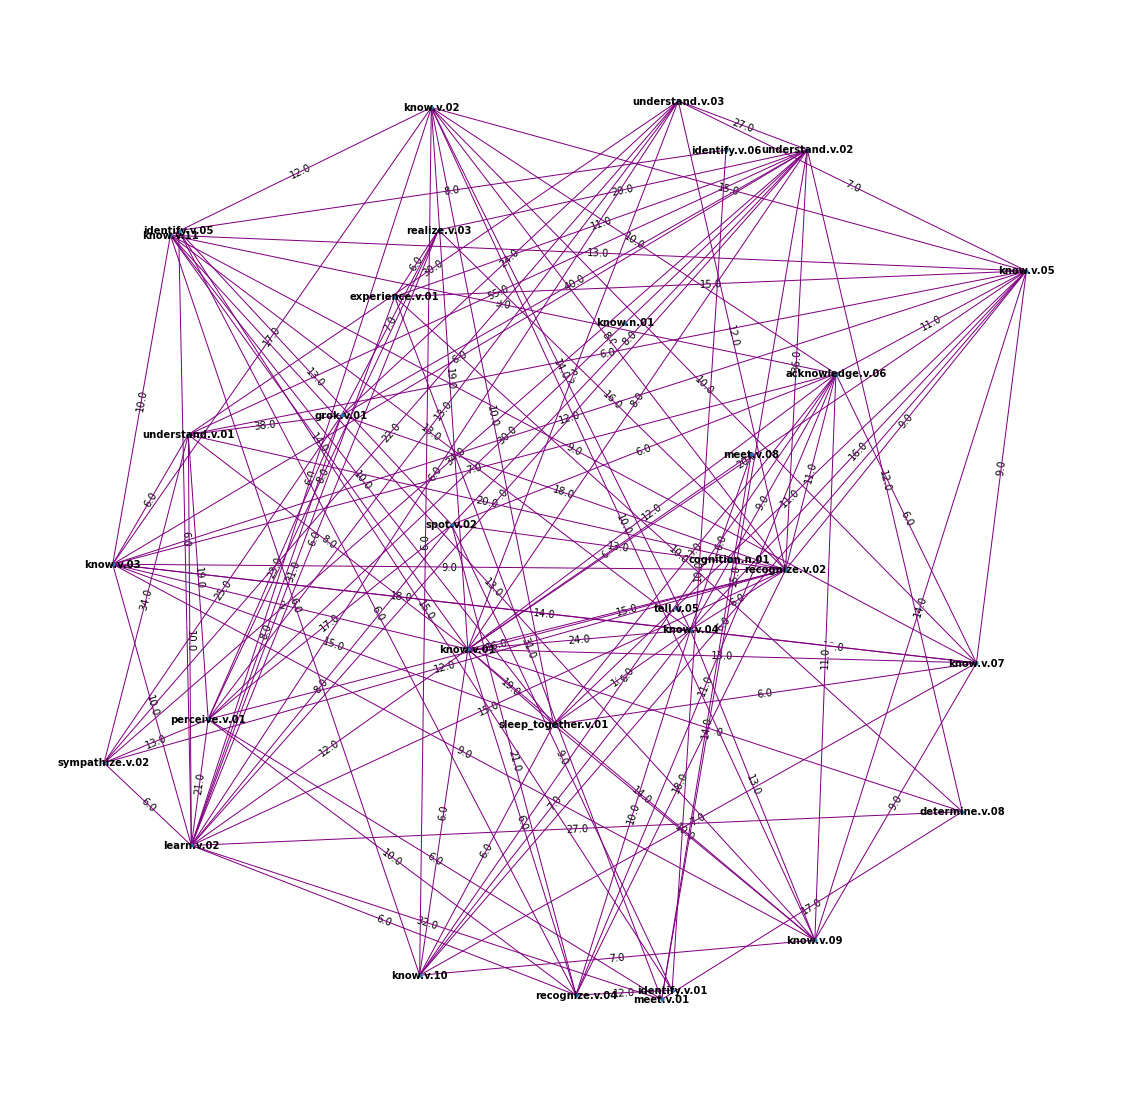

In [611]:
import matplotlib.pyplot as plt 

#способ "укладки" графа
pos=nx.random_layout(G2)
#размер графа
plt.figure(figsize=(20, 20))
#рисуем узлы графа  в соответствии с распределением pos и устанавливаем размер узлов ==10
nx.draw_networkx_nodes(G2, pos, node_size=10) 
# получаем веса ребер 
labels = nx.get_edge_attributes(G2, 'weight')
#рисуем метки для рёбер, используя полученные веса
nx.draw_networkx_edge_labels(G2, pos, edge_labels=labels)
#alpha=0.3 - прозрачность рёбер, edge_color='red' - цвет рёбер красный
nx.draw_networkx_edges(G2, pos, alpha= 1, edge_color='purple')
#font_size=10 размер шрифта = 10, font_weight='bold' жирный текст 
nx.draw_networkx_labels(G2, pos, font_size=10, font_weight='bold')
#убираем оси
plt.axis('off') 
plt.show()

### Анализ графа: 

### Связные компоненты

In [612]:
#Связные компоненты

from collections import Counter
# Выделение связных компонент

components = nx.components.connected_components(G2)
component_lengths = Counter([len(i) for i in components])
component_lengths.most_common()

[(1, 3), (29, 1)]

In [613]:
components = nx.components.connected_components(G1)
nodes = sorted([(i, len(i)) for i in components], key=lambda x: x[1], reverse=True)[0][0]
len(nodes)

32

### Плотность графа

In [614]:
# Плотность графа

print('Плотность графа:', nx.density(G2))

Плотность графа: 0.28024193548387094


### Распределение взвешенных степеней узлов.

In [615]:
# Распределение взвешенных степеней узлов.
# Взвешенная степень (weighted degree) – это количество связей узла, разделенное на общее количество связей в графе
weighted_degrees = dict(G2.degree(weight = 'weight'))
print("Распределение взвешенных степеней узлов:")
for node, degree in weighted_degrees.items():
    print(f"{node}: {degree}")

Распределение взвешенных степеней узлов:
know.n.01: 0
know.v.01: 235.0
know.v.02: 137.0
know.v.03: 160.0
know.v.04: 156.0
know.v.05: 164.0
acknowledge.v.06: 118.0
know.v.07: 93.0
sleep_together.v.01: 106.0
know.v.09: 110.0
know.v.10: 57.0
know.v.11: 109.0
understand.v.02: 321.0
learn.v.02: 229.0
tell.v.05: 0
recognize.v.02: 234.0
perceive.v.01: 176.0
experience.v.01: 104.0
recognize.v.04: 100.0
determine.v.08: 72.0
realize.v.03: 63.0
meet.v.01: 115.0
grok.v.01: 183.0
understand.v.01: 226.0
identify.v.01: 46.0
spot.v.02: 95.0
sympathize.v.02: 146.0
cognition.n.01: 0
meet.v.08: 26.0
understand.v.03: 147.0
identify.v.06: 18.0
identify.v.05: 48.0


### Центральные узлы

In [616]:
# Подграф 
B = G2.subgraph(nodes)

In [617]:
metric1_G2 = nx.degree_centrality(G2)
for nodeid in sorted(metric1_G2, key = metric1_G2.get, reverse = True):
    print(nodeid)

know.v.01
learn.v.02
recognize.v.02
know.v.05
understand.v.02
know.v.03
know.v.04
acknowledge.v.06
know.v.02
perceive.v.01
know.v.07
sleep_together.v.01
know.v.09
know.v.11
understand.v.01
know.v.10
recognize.v.04
understand.v.03
grok.v.01
spot.v.02
sympathize.v.02
experience.v.01
realize.v.03
meet.v.01
determine.v.08
identify.v.05
identify.v.01
meet.v.08
identify.v.06
know.n.01
tell.v.05
cognition.n.01


По данной метрике позиции по первому и второму графу совпадают только для синсетов know.v.01 и know.v.02.

Синсет sleep_together (как мне кажется, никак не относящийся к know), который в прошлом графе был в первой пятерке по данной метрике, опустился на 12 место.

В последней пятерке как по первому графу, так и по второму стоят синсеты cognition.n.01, meet.v.08, identify.v.06. Эти синсеты достаточно далеки по семантике от know. 

Практически все слова, которые я посчитала далекими по семантике от know, изменили свое место на более низкое во втором графе: sleep together, determine.v.08, spot.v.02, sympathize.v.02, meet.v.01, tell.v.05. Есть и те, которые стали стоять в выдаче выше: perceive.v.01, experience.v.01. 

In [618]:
metric2_G2 = nx.betweenness_centrality(G2)
for nodeid in sorted(metric2_G2, key = metric2_G2.get, reverse = True):
    print(nodeid)

learn.v.02
know.v.01
recognize.v.02
recognize.v.04
identify.v.05
know.v.05
understand.v.02
acknowledge.v.06
know.v.04
spot.v.02
know.v.03
perceive.v.01
know.v.02
identify.v.01
meet.v.01
understand.v.01
experience.v.01
understand.v.03
meet.v.08
determine.v.08
realize.v.03
grok.v.01
know.v.07
sleep_together.v.01
know.v.09
know.v.11
know.n.01
know.v.10
tell.v.05
sympathize.v.02
cognition.n.01
identify.v.06


Интересно, что по этой метрике единственной learn.v.02 стоит на первом месте и является самым частым «перевалочным пунктом».

По данной метрике в обоих графах совпадают позиции синсетов acknowledge.v.06, know.n.01, cognition.n.01 и identify.v.06

Во втором и в первом графе по этой метрике в последние пять значений входят tell.v.05, cognition.n.01, identify.v.06. 

Стоят на позициях ниже, чем в первом графе, из тех, которые далеки по семантике от know: sleep_together.v.01, determine.v.08, sympathize.v.02, tell.v.05; на позициях выше: spot.v.02, perceive.v.01, experience.v.01, meet.v.08, meet.v.01

In [619]:
metric3_G2 = nx.closeness_centrality(G2)
for nodeid in sorted(metric3_G2, key = metric3_G2.get, reverse = True):
    print(nodeid)

know.v.01
learn.v.02
recognize.v.02
understand.v.02
know.v.04
know.v.03
acknowledge.v.06
know.v.02
know.v.05
recognize.v.04
understand.v.01
spot.v.02
understand.v.03
perceive.v.01
experience.v.01
determine.v.08
know.v.07
sleep_together.v.01
know.v.09
know.v.11
know.v.10
grok.v.01
sympathize.v.02
realize.v.03
meet.v.01
identify.v.05
meet.v.08
identify.v.01
identify.v.06
know.n.01
tell.v.05
cognition.n.01


В последней пятерке как по первому графу, так и по второму стоят синсеты identify.v.01, cognition.n.01 и identify.v.06.

По данной метрике в обоих графах совпадает только позиция синсета determine.v.08.

Слова с семантикой далекой от know, изменившие свое место на более низкое во втором графе:sleep_together.v.01, sympathize.v.02, tell.v.05, meet.v.01; синсеты, которые стоят в выдаче выше, чем прежде: spot.v.02, perceive.v.01, experience.v.01, meet.v.08

In [620]:
metric4_G2 = nx.eigenvector_centrality(G2)
for nodeid in sorted(metric4_G2, key = metric4_G2.get, reverse = True):
    print(nodeid)

know.v.01
recognize.v.02
know.v.05
know.v.03
acknowledge.v.06
know.v.02
know.v.04
learn.v.02
know.v.07
sleep_together.v.01
know.v.09
know.v.11
understand.v.02
know.v.10
understand.v.01
understand.v.03
perceive.v.01
recognize.v.04
grok.v.01
spot.v.02
sympathize.v.02
realize.v.03
experience.v.01
determine.v.08
meet.v.01
meet.v.08
identify.v.05
identify.v.01
identify.v.06
know.n.01
tell.v.05
cognition.n.01


В последней пятерке как по первому графу, так и по второму стоят синсеты identify.v.01, identify.v.06, cognition.n.01.

По данной метрике в обоих графах совпадают позиции синсетов know.v.01, know.v.05, know.v.03, spot.v.02.

Практически все слова, которые я посчитала далекими по семантике от know, изменили свое место: стали стоять в выдаче ниже: sleep_together.v.01, determine.v.08, sympathize.v.02, meet.v.01, tell.v.05; стали стоять в выдаче выше: learn.v.02, perceive.v.01, experience.v.01, meet.v.08

### Сообщества

In [621]:
from networkx.algorithms import community
    
communities_generator_G2 = community.girvan_newman(G2) # убирает постепенно по ребру с наиболее высокой betweenness centrality
top_level_communities_G2 = next(communities_generator_G2)
next_level_communities_G2 = next(communities_generator_G2)
print("top level communities:", sorted(map(sorted, top_level_communities_G2)))
print("next level communities:", sorted(map(sorted, next_level_communities_G2)))

top level communities: [['acknowledge.v.06', 'determine.v.08', 'experience.v.01', 'grok.v.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'know.v.07', 'know.v.09', 'know.v.10', 'know.v.11', 'learn.v.02', 'meet.v.01', 'meet.v.08', 'perceive.v.01', 'realize.v.03', 'recognize.v.02', 'recognize.v.04', 'sleep_together.v.01', 'spot.v.02', 'sympathize.v.02', 'understand.v.01', 'understand.v.02', 'understand.v.03'], ['cognition.n.01'], ['identify.v.01', 'identify.v.05', 'identify.v.06'], ['know.n.01'], ['tell.v.05']]
next level communities: [['acknowledge.v.06', 'determine.v.08', 'experience.v.01', 'grok.v.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'know.v.07', 'know.v.09', 'know.v.10', 'know.v.11', 'learn.v.02', 'meet.v.01', 'perceive.v.01', 'realize.v.03', 'recognize.v.02', 'recognize.v.04', 'sleep_together.v.01', 'spot.v.02', 'sympathize.v.02', 'understand.v.01', 'understand.v.02', 'understand.v.03'], ['cognition.n.01'], ['identify.v.01', 'id

На верхнем уровне выделено 5 основных сообществ. Первое, в которое входят семантичсеки близкие синсеты к know, имеющие разный уровень абстракции. Второе - cognition- понимание - единственное существительное среди синсетов. Третье - identify во всех значениях. Четвертое - основной синсет know.n.01. Пятое - tell, про акт сообщения или донесения какой-то информации человеку, но также имеющее семантику когнитивной нагрузки (способностей), как know.
На следующем уровне прибывилось одно сообщество - meet.v.08 - слово, явно отделяющееся семантически от остальных

In [622]:
from networkx.algorithms import community

communities_generator2_G2 = community.greedy_modularity_communities(G2) # данный алгоритм использует модулярность, которая в свою очередь опирается на плотность связей внутри группы
communities_generator2_G2

[frozenset({'determine.v.08',
            'experience.v.01',
            'grok.v.01',
            'identify.v.01',
            'identify.v.05',
            'identify.v.06',
            'learn.v.02',
            'meet.v.01',
            'meet.v.08',
            'perceive.v.01',
            'realize.v.03',
            'recognize.v.02',
            'recognize.v.04',
            'spot.v.02',
            'sympathize.v.02',
            'understand.v.01',
            'understand.v.02',
            'understand.v.03'}),
 frozenset({'acknowledge.v.06',
            'know.v.01',
            'know.v.02',
            'know.v.03',
            'know.v.04',
            'know.v.05',
            'know.v.07',
            'know.v.09',
            'know.v.10',
            'know.v.11',
            'sleep_together.v.01'}),
 frozenset({'know.n.01'}),
 frozenset({'tell.v.05'}),
 frozenset({'cognition.n.01'})]

Сет 1 составляет основной пул слов, входящих в семантическое поле, близких и расплывчатых значений к know. Основные значения слов, входящих в сет -  понимание, осознавание, связаны со вниманием и когнитивными усилиями.

Сет 2 составляют все значения know и sleep_together, который, возможно, попадает сюда из-за частотности.

Сет 3 состоит только из know.n.01, основного синсета.

Сет 4 состоит из tell.v.05, который выбивается из первого сета потому, что представляет совершенно другой концепт, нежели know. Know - про обладание информацией в уме и способность осознавать ее и понимать, tell - про акт сообщения или донесения какой-то информации человеку. 

Сет 5 представлен существительным cognition.n.01, возможно, разделение по части речи стало решающим фактором, так как в зависимости от части речи лемма употребляется в немного разных контекстах, имеет различные семантические роли. 

Алгоритм greedy_modularity_communities разделил синсеты первого графа на два сета, для второго графа разделение более детально. Однако есть сходства: синсеты experience.v.01, grok.v.01, learn.v.02, meet.v.01, perceive.v.01, realize.v.03, recognize.v.02, sympathize.v.02, understand.v.01, understand.v.02 оказались в первом сете для обоих графов. Это говорит о том, что эти синсеты точно объединены общим значениям и сильно звязаны друг с другом.

In [623]:
communities_generator3_G2 = community.kernighan_lin_bisection(G2, partition=None, max_iter=10, weight='weight', seed=None)
communities_generator3_G2

({'cognition.n.01',
  'determine.v.08',
  'experience.v.01',
  'identify.v.01',
  'identify.v.05',
  'identify.v.06',
  'know.n.01',
  'know.v.10',
  'learn.v.02',
  'meet.v.01',
  'meet.v.08',
  'perceive.v.01',
  'realize.v.03',
  'recognize.v.04',
  'spot.v.02',
  'tell.v.05'},
 {'acknowledge.v.06',
  'grok.v.01',
  'know.v.01',
  'know.v.02',
  'know.v.03',
  'know.v.04',
  'know.v.05',
  'know.v.07',
  'know.v.09',
  'know.v.11',
  'recognize.v.02',
  'sleep_together.v.01',
  'sympathize.v.02',
  'understand.v.01',
  'understand.v.02',
  'understand.v.03'})

В первом наборе находят синсеты с более далеким, расплывчатым значением от know. Второй набор содержит более близкие по значению слова к know + все значения know (кроме sleep_together).

Синсет identify.v.01 присутствует в первом сете для первого и второго графа. Синсеты meet.v.08 и tell.v.05 встречаются во втором сете у первого и второго графов. 

В остальном, если порядок сообществ не имеет значения, то первый сет первого графа практически идентичен второму сету второго графа (второй тоже самое). 

## Шаг 6 (1 балл)
Подведите небольшой теоретический итог. Какие выводы о колексификациях в зоне глаголов знания позволяют сделать эти два графа?

В целом, метрики поиска центральных узлов графа 1 показывают более схожие результаты, чем метрики графа 2. Однако, синсеты, семантика которых мне показалась более далекой от значения "знать", в метриках, посчитанных для графа 2, появляются в выдаче позже, чем для графа 1. Это позволяет сделать вывод, что второй граф, связи которого более сильные (минимальный вес узла = 5), является более продуктивным и показывает более прочные семантические связи.  
Семантическую карту "знать" составляют следующие слова в различных значениях (выделенные из синсетов):

- know
- learn
- recognize
- understand
- acknowledge
- perceive
- sleep_together
- grok
- spot
- sympathize
- experience
- realize
- meet
- determine
- identify
- meet
- tell
- cognition

По метрикам можно понять, какие синсеты являются самыми важными в графах: 
- know.v.01
- know.v.05
- know.v.04
- know.v.03 

Также по метрикам можно понять, какие слова имеют незначительные связи со всеми остальными узлами => далекое значение от изначально выбранного синсета: 
- experience
- identify
- cognition
- meet 
- tell
- know.n.01

## Шаг 7 (бонусный, 1 балл)


Сравните ваши графы с подграфом Know из базы CLICS. Что общего, в чем отличия? С чем эти отличия могут быть связаны?



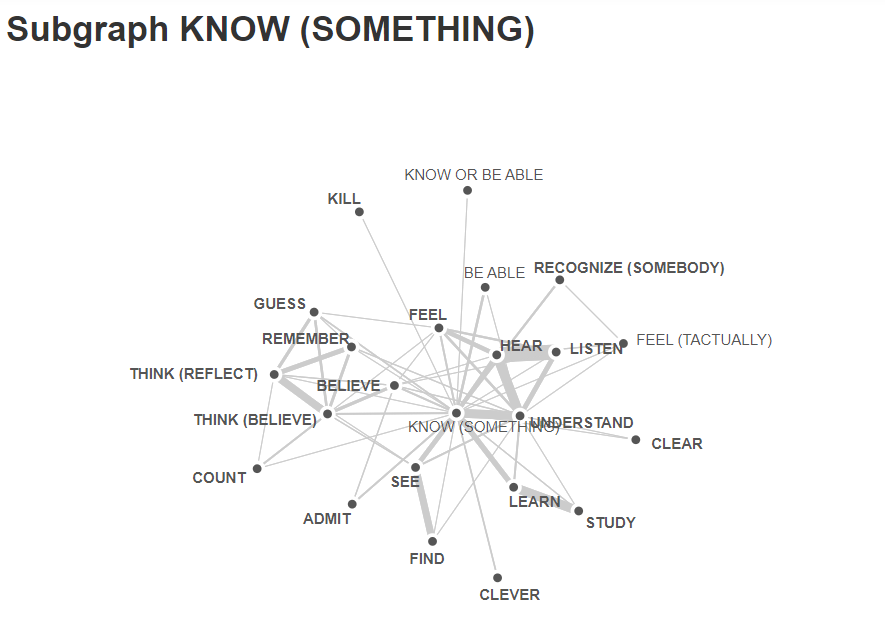 

Количество узлов в CLICS меньше, чем в моих графах.

Узлы CLICS: 

**know**, hear, **understand**, listen, feel, believe, see, find, learn, remember, guess, kill, recognize (somebody), think (reflect), think (believe), count, clever, study, clear, feel (tactually), admit, be able

Мои узлы: 

'know.n.01', **'know.v.01'**, 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'acknowledge.v.06', 'know.v.07', 'sleep_together.v.01', 'know.v.09', 'know.v.10', 'know.v.11', **'understand.v.02'**, **'learn.v.02'**, 'tell.v.05', **'recognize.v.02'**, 'perceive.v.01', 'experience.v.01',**'recognize.v.04'**, 'determine.v.08', 'realize.v.03', 'meet.v.01', 'grok.v.01', **'understand.v.01'**, 'identify.v.01', 'spot.v.02','sympathize.v.02', 'cognition.n.01', 'meet.v.08', **'understand.v.03'**, 'identify.v.06', 'identify.v.05'.

Граф из CLICS достаточно сильно отличается от графов, которые получились у меня. Жирным выделены узлы, которые совпадают во всех графах. В моих графах в большом количестве присутствуют синсеты know (т.е., можно сказать, что know близко с самим собой в различных значениях). В CLICS в граф входит только два значения слова know: KNOW SOMETHING и KNOW OR BE ABLE, т.е можно сделать вывод, что в сети CLICS слова с несколькими значениям имеют один гибридный вектор (это может объяснить меньшее количество узлов в графе CLICS)
В моих графах и в графе из CLICS присутствуют слова далекие по значению к target word: в моих графах - meet, в CLICS -kill, clear. Кроме того, во всех графах присутствует узлы - существительные (clever в CLICS, 'cognition.n.01', 'know.n.01' в моих графах)